In [1]:
%matplotlib inline

In [2]:
%load_ext line_profiler

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from arc import Rubidium85, ShirleyMethod

In [5]:
atom = Rubidium85()
t = [56, 2, 2.5]

mj = 0.5
q = 0

In [6]:
m = ShirleyMethod(atom)
m.defineBasis(
    *t,
    mj,
    basisStates=[
        [56, 2, 2.5, 0.5],
        [57, 1, 1.5, 0.5]
    ],
    progressOutput=True,
    debugOutput=False,
)
m.defineShirleyHamiltonian(fn=1)

Generating matrix...
100%
Energies and Couplings Generated


In [7]:
Efield = 5 # V/m
f0 = 12.0073e9 # Hz

efields = np.geomspace(1e-4, 1, 10) * Efield
dets = np.linspace(-1e9, 1e9, 101)
freqs = dets + f0

In [8]:
m.diagonalise(Efield, freqs, progressOutput=True)

Finding eigenvectors...


In [9]:
print(m.indexOfCoupledState)

0


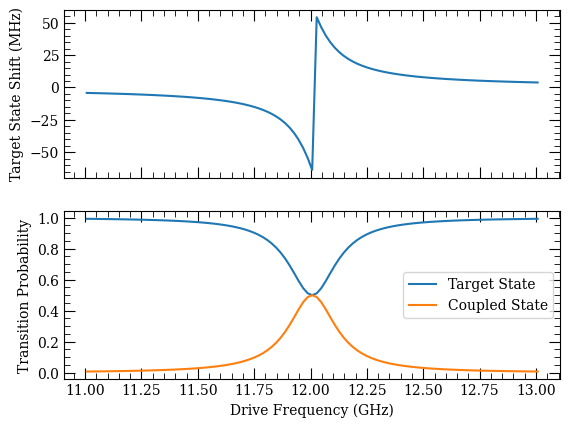

In [10]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)

ax1.plot(freqs*1e-9, m.targetShifts*1e-6)

ax2.plot(freqs*1e-9, m.transProbs[:,0], label='Target State')
ax2.plot(freqs*1e-9, m.transProbs[:,1], label='Coupled State')
ax1.set_ylabel('Target State Shift (MHz)')
ax2.set_ylabel('Transition Probability')
ax2.set_xlabel('Drive Frequency (GHz)')
ax2.legend();

Diagonalize a single point

In [11]:
m.diagonalise(Efield, f0-1e8*0, progressOutput=True)

Finding eigenvectors...


In [12]:
dim0 = len(m.basisStates)
dim1 = 2*m.fn + 1
refInd = m.fn * dim0
tarInd = m.indexOfCoupledState + refInd
print(refInd)
print(tarInd)
eigs = m.eigs.copy()
egvector = m.eigVectors.copy()

2
2


In [13]:
m1 = (np.abs(np.einsum('km,m->km', egvector.conj().T, egvector[:,tarInd]))**2)
print(m1.shape)
m2 = m1.reshape((2 * m.fn + 1, dim0, (2 * m.fn + 1) * dim0))
print(m2.shape)
m3 = m2.sum(axis=(0,-1))
print(m3)
print(m3.sum())

(6, 6)
(3, 2, 6)
[0.49999712 0.50000288]
0.9999999999999992


In [51]:
m1 = (np.abs(egvector * egvector[tarInd].conj())**2)
print(m1.shape)
m2 = m1.reshape((2 * m.fn + 1, dim0, (2 * m.fn + 1) * dim0))
print(m2.shape)
m3 = m2.sum(axis=(0,-1))
print(m3)
print(m3.sum())

(6, 6)
(3, 2, 6)
[0.49999362 0.50000638]
0.9999999999999997


In [525]:
print((egvector.conj() * egvector[:,tarInd]) * np.exp(-1.0j*2*np.pi*eigs*ts[-1]))
(egvector.conj() * egvector[:,tarInd]).sum(axis=-1)

[[ 1.34176906e-16-5.99300043e-17j  5.58426840e-15-1.62475704e-15j
   4.80747693e-17-2.33703194e-17j -2.93145029e-20+5.29366811e-21j
   1.43393961e-22-5.20191428e-23j  2.22425012e-24-4.76589991e-25j]
 [ 8.21467617e-01-3.66907831e-01j -3.56475709e-28+1.03717510e-28j
   7.11897381e-31-3.46070703e-31j -5.01097380e-04+9.04891078e-05j
   2.61831742e-06-9.49849120e-07j  1.40098974e-35-3.00190020e-36j]
 [-2.18303731e-03+9.75051808e-04j  1.57555872e-30-4.58412801e-31j
  -3.17480277e-33+1.54334916e-33j -1.87529400e-01+3.38644119e-02j
   9.86539078e-04-3.57887576e-04j  3.16868515e-33-6.78954050e-34j]
 [-2.55364332e-14+1.14058268e-14j -1.15089512e-14+3.34855851e-15j
   2.33262359e-17-1.13394529e-17j -5.25401518e-18+9.48779949e-19j
   2.63400232e-20-9.55539144e-21j  8.33482802e-22-1.78590329e-22j]
 [ 5.27258951e-17-2.35499774e-17j  3.05452548e-17-8.88721925e-18j
  -6.23300437e-20+3.03001564e-20j  1.86005359e-15-3.35891977e-16j
  -9.98271368e-18+3.62143708e-18j  3.13636019e-19-6.72027782e-20j]
 [ 5.

array([-6.01620803e-15+0.j, -8.99177084e-01+0.j,  1.91903966e-01+0.j,
        3.99334458e-14+0.j, -1.96932851e-15+0.j, -3.93260014e-01+0.j])

In [15]:
tau = 1/f0
print(f'Drive period: {tau*1e12:.3f} fs')
ts = np.linspace(0, 2*tau, 100)

Drive period: 83.283 fs


In [42]:
u2a = np.einsum('km,m->km', egvector.conj().T, egvector[:, tarInd])
print(u2a.shape)
print(u2a)

(6, 6)
[[ 1.14597547e-16+0.j  2.15382513e-14+0.j  2.52493315e-19+0.j
  -2.18119757e-14+0.j -1.18732784e-19+0.j  3.55883483e-24+0.j]
 [-4.99999686e-01+0.j  4.68681985e-28+0.j  9.14440565e-33+0.j
   4.99996184e-01+0.j  3.50173392e-06+0.j  2.56588989e-37+0.j]
 [ 5.00560339e-01+0.j  4.63899516e-28+0.j  9.10302825e-33+0.j
   4.99436145e-01+0.j  3.51637401e-06+0.j  2.58221192e-37+0.j]
 [-7.54758808e-20+0.j -4.03886643e-17+0.j  6.74268592e-17+0.j
  -1.37979716e-17+0.j -1.33240954e-17+0.j  3.59520914e-19+0.j]
 [ 7.13757704e-20+0.j  4.02205099e-17+0.j -6.75024678e-17+0.j
   1.31856127e-17+0.j  1.33240954e-17+0.j  3.59118232e-19+0.j]
 [ 4.95495950e-06+0.j  9.52757543e-31+0.j -9.63927937e-31+0.j
   1.87023820e-03+0.j -1.87519316e-03+0.j  2.70658151e-35+0.j]]


In [16]:
u1 = np.exp(-1.0j*2*np.pi*eigs[None,:]*ts[:,None])
print(u1.shape)
u2 = np.einsum('lm,km,m->lk',u1, egvector.conj().T, egvector[:,tarInd])
u3 = np.abs(u2)**2
print(u3.shape)
u4 = u3.reshape(u3.shape[:-1] + (dim1, dim0))
print(u4.shape)
u5 = u4.sum(axis=-2)
print(u5.shape)
print(np.mean(u5,axis=0))

(100, 6)
(100, 6)
(100, 3, 2)
(100, 2)
[0.50369461 0.49630539]


In [17]:
print(f0*1e-6, "MHz")
print(eigs, "Hz")
print(np.diff(eigs)*1e-6, "MHz")

12007.3 MHz
[-1.12538300e+12 -1.11343918e+12 -1.11331208e+12 -1.10143171e+12
 -1.10130461e+12 -1.08936079e+12] Hz
[11943.81880144   127.10484307 11880.36334369   127.10484308
 11943.81880144] MHz


In [33]:
t = np.arange(6).reshape(2,3)
print(t)
o = np.einsum('ij->j',t)
print(o)
o = np.einsum('ij->i',t)
print(o)

[[0 1 2]
 [3 4 5]]
[3 5 7]
[ 3 12]


In [54]:
egvector

array([[ 1.61974669e-16+0.j, -7.06710451e-01+0.j,  7.07502890e-01+0.j,
        -1.06679254e-19+0.j,  1.00884069e-19+0.j,  7.00344772e-06+0.j],
       [ 9.99996498e-01+0.j,  2.17603713e-14+0.j,  2.15383267e-14+0.j,
        -1.87519973e-03+0.j,  1.86739251e-03+0.j,  4.42354486e-17+0.j],
       [-2.64640884e-03+0.j, -9.58434720e-17+0.j, -9.54097912e-17+0.j,
        -7.06707963e-01+0.j,  7.07500425e-01+0.j,  1.01030295e-14+0.j],
       [-3.08641997e-14+0.j,  7.07500425e-01+0.j,  7.06707963e-01+0.j,
        -1.95242905e-17+0.j,  1.86577956e-17+0.j,  2.64640884e-03+0.j],
       [ 6.33174069e-17+0.j, -1.86739251e-03+0.j, -1.87519973e-03+0.j,
         7.10542736e-15+0.j, -7.10542736e-15+0.j,  9.99996498e-01+0.j],
       [ 7.00344772e-06+0.j,  5.04942674e-19+0.j,  5.08154693e-19+0.j,
         7.07502890e-01+0.j,  7.06710451e-01+0.j,  5.32629442e-17+0.j]])

In [56]:
u1 = np.exp(-1.0j*2*np.pi*eigs[None,:]*ts[:,None])
print(u1.shape)
u2 = np.einsum('lm,km,m->lk',u1, egvector, egvector[tarInd]) # temp removing conjugation as unnecessary
u3 = np.abs(u2)**2
print(u3.shape)
u4 = u3.reshape(u3.shape[:-1] + (dim1, dim0))
print(u4.shape)
u5 = u4.sum(axis=-2)
print(u5.shape)
print(np.mean(u5,axis=0))

(100, 6)
(100, 6)
(100, 3, 2)
(100, 2)
[0.99850544 0.00149456]


In [36]:
u2.shape

(100, 6)

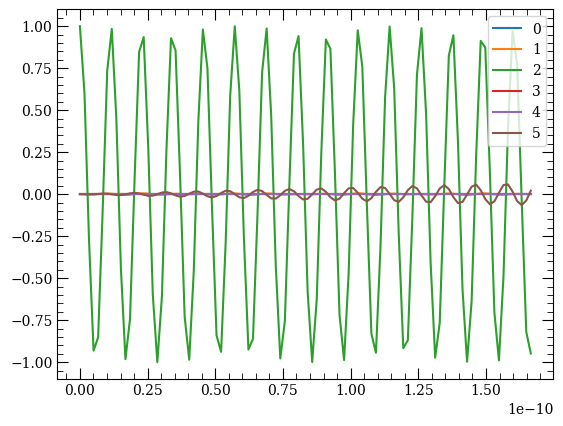

In [50]:
fig, ax = plt.subplots(1)

ax.plot(ts, u2.real, label=list(range(6)))
ax.legend()

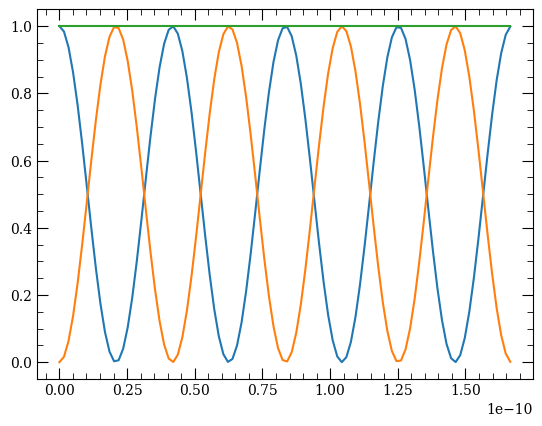

In [29]:
fig, ax = plt.subplots(1)

ax.plot(ts, u5)
ax.plot(ts, u5.sum(axis=-1))

Diagonalize the whole array

In [593]:
m.diagonalise(efields, freqs, progressOutput=True)

Finding eigenvectors...


In [537]:
tau = 1/f0
print(f'Drive period: {tau*1e12:.3f} fs')
ts = np.linspace(0, 2*tau, 100)

Drive period: 83.283 fs


In [538]:
dim0 = len(m.basisStates)
dim1 = 2*m.fn + 1
refInd = m.fn * dim0
tarInd = m.indexOfCoupledState + refInd
cInd = tarInd + 1
print(refInd, tarInd, cInd)

2 2 3


In [539]:
ut = np.exp(-1.0j*2*np.pi*np.einsum('...i,j->j...i', m.eigs, ts))
print(ut.shape)
print(m.eigVectors.shape)
print(m.eigVectors[...,tarInd,:].shape)

(100, 10, 101, 6)
(10, 101, 6, 6)
(10, 101, 6)


In [408]:
u2 = np.einsum('l...m,...km,...m->l...k',
                    ut,
                    np.conj(m.eigVectors),
                    m.eigVectors[...,tarInd,:]
                   )
print(u2.shape)

(4, 10, 101, 6)


In [409]:
us = u2[:,-1,51]
us2 = us.reshape(us.shape[:-1] + (dim1, dim0))
print(us2)
print(np.abs(us2))
print(np.abs(us2)**2)
print(np.sum(np.abs(us2)**2, axis=-2))

[[[ 1.20870502e-19+0.00000000e+00j -8.67361738e-19+0.00000000e+00j]
  [ 1.00000000e+00+0.00000000e+00j -1.32698200e-19+0.00000000e+00j]
  [-8.70127300e-17+0.00000000e+00j -5.55111512e-17+0.00000000e+00j]]

 [[ 3.30964925e-18+1.00778303e-18j  4.18630313e-03+1.87881612e-03j]
  [ 5.88053610e-01+8.08505072e-01j -1.46089945e-16+1.56191979e-16j]
  [-1.58559293e-14-7.03055672e-15j  1.78826425e-02-1.31017565e-02j]]

 [[ 3.85607290e-18-4.01917840e-18j -3.40737447e-03+3.02884405e-03j]
  [-3.07711275e-01+9.50435796e-01j  1.87456522e-16+1.04197212e-16j]
  [ 1.28427225e-14-1.18037052e-14j  4.22643529e-02+1.33607737e-02j]]

 [[-2.80739403e-18-8.51796404e-18j  2.22793336e-05+5.13146166e-05j]
  [-9.48471994e-01+3.09812541e-01j -4.36734589e-19-1.07182214e-18j]
  [ 1.28698359e-16+1.78465739e-16j  2.12923929e-02+6.29578917e-02j]]]
[[[1.20870502e-19 8.67361738e-19]
  [1.00000000e+00 1.32698200e-19]
  [8.70127300e-17 5.55111512e-17]]

 [[3.45968276e-18 4.58858191e-03]
  [9.99743717e-01 2.13864926e-16]
  [1

In [540]:
eVecs = m.eigVectors.reshape(m.eigVectors.shape[:-2] + (dim1,dim0,dim1,dim0))
m1 = np.einsum('...jkmn,...mn->...jkmn', eVecs.conj(),
               eVecs[...,m.fn,m.indexOfCoupledState,:,:])
print(m1.shape)
m2 = np.abs(m1)**2
m3 = m2.sum(axis=(-4,-2,-1))
print(m3.shape)

(10, 101, 3, 2, 3, 2)
(10, 101, 2)


In [554]:
eVecs = m.eigVectors.reshape(m.eigVectors.shape[:-2] + (dim1,dim0,dim1,dim0))
m1 = np.einsum('...mnjk,...mn->...jkmn', eVecs.conj(),
               eVecs[...,m.fn,m.indexOfCoupledState])
print(m1.shape)
m2 = np.abs(m1)**2
m3 = m2.sum(axis=(-4,-2,-1))
print(m3.shape)

(10, 101, 3, 2, 3, 2)
(10, 101, 2)


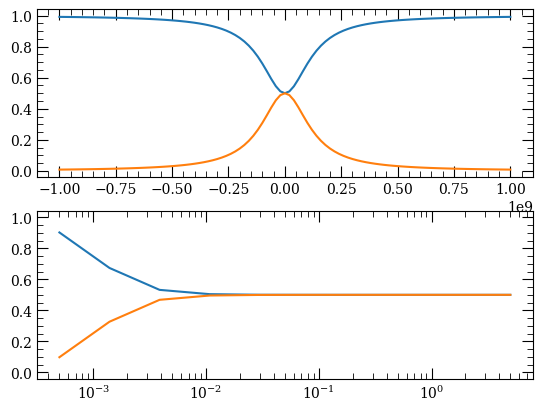

In [555]:
fig, (ax1, ax2) = plt.subplots(2,sharex=False,sharey=True)

ax1.plot(dets, m3[-1,:,:])

ax2.plot(efields, m3[:,50,:])
ax2.set_xscale('log')

In [462]:
ti = 0
tki = 1
ci = 1
new_shape = m.eigVectors.shape[:-2] + (dim1, dim0) + (dim1,dim0)
eVecs = m.eigVectors.reshape(new_shape)
eVals = m.eigs.reshape(m.eigs.shape[:-1]+ (dim1, dim0))
print(eVecs.shape, eVals.shape)

ut = np.exp(-1.0j*2*np.pi*np.einsum('i,...->i...', ts, eVals))
print(ut.shape)

u2 = np.einsum('...kmn,j...mn,...mn->j...k',
          np.conj(eVecs[...,:,ci,:,:]),
          ut,
          eVecs[...,tki,ti,:,:])
print(u2.shape)
u3 = np.abs(u2)**2
operand = u3.sum(axis=-1)
print(operand.shape)
#u2 = np.einsum('...m,l...m,...m->l...',

(10, 101, 3, 2, 3, 2) (10, 101, 3, 2)
(100, 10, 101, 3, 2)
(100, 10, 101, 3)
(100, 10, 101)


Text(0.5, 0, 'Time ($\\tau$)')

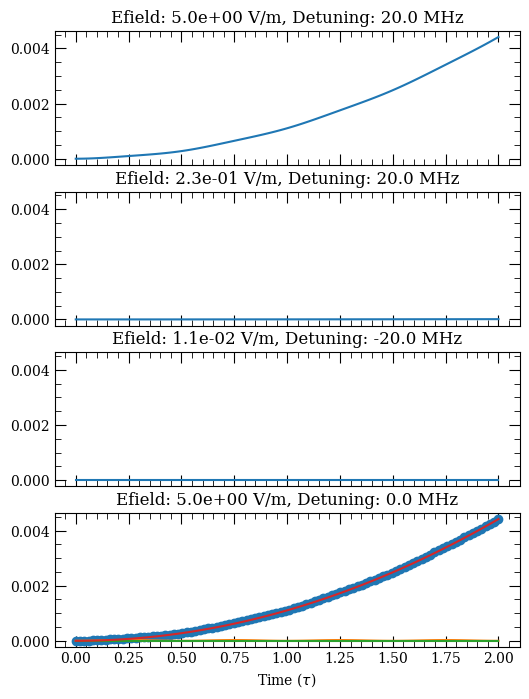

In [464]:
fig, (ax1,ax2,ax3, ax4) = plt.subplots(4, sharex=True, figsize=(6,8),sharey=True)

#ax1.set_ylim((0,1.1))
e = -1; f = 51;
ax1.set_title(f'Efield: {efields[e]:.1e} V/m, Detuning: {(freqs[f]-f0)*1e-6:.1f} MHz')
ax1.plot(ts/tau, operand[:,e,f])

e = 6; f = 51;
ax2.set_title(f'Efield: {efields[e]:.1e} V/m, Detuning: {(freqs[f]-f0)*1e-6:.1f} MHz')
ax2.plot(ts/tau, operand[:,e,f])

e = 3; f = 49;
ax3.set_title(f'Efield: {efields[e]:.1e} V/m, Detuning: {(freqs[f]-f0)*1e-6:.1f} MHz')
ax3.plot(ts/tau, operand[:,e,f])

e = -1; f = 50;
ax4.set_title(f'Efield: {efields[e]:.1e} V/m, Detuning: {(freqs[f]-f0)*1e-6:.1f} MHz')
ax4.plot(ts/tau, operand[:,e,f],'o-')
ax4.plot(ts/tau, u3[:,e,f])
ax4.set_xlabel('Time ($\\tau$)')

In [605]:
tau = 1/f0
ts = np.linspace(0, 2*tau, 100)

ut = np.exp(-1.0j*2*np.pi*np.einsum('i,...j->i...j', ts, m.eigs))
operand = (np.abs(np.einsum('...mk,l...m,...m->l...k', # note transpose of first input
                    m.eigVectors.conj(),
                    ut,
                    m.eigVectors[...,tarInd]
                   ))**2).reshape(ut.shape[:-1] + (dim1, dim0)
                            ).sum(axis=-2)
print(operand.shape)

(100, 10, 101, 2)


Text(0.5, 0, 'Time ($\\tau$)')

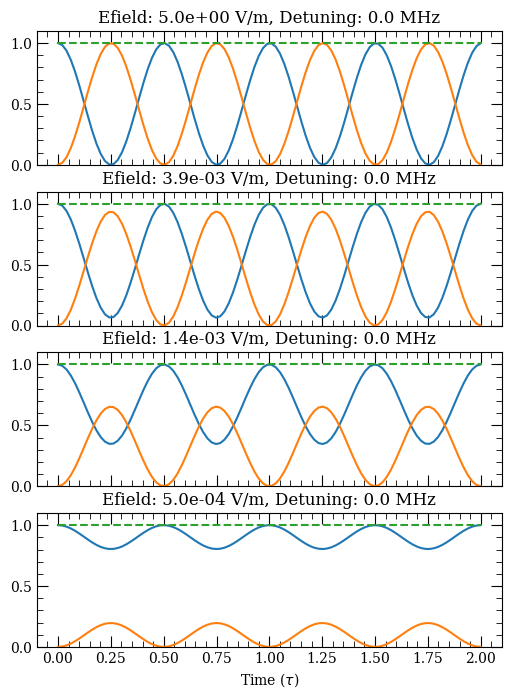

In [606]:
fig, (ax1,ax2,ax3, ax4) = plt.subplots(4, sharex=True, figsize=(6,8),sharey=True)

ax1.set_ylim((0,1.1))
e = -1; f = 50;
ax1.set_title(f'Efield: {efields[e]:.1e} V/m, Detuning: {(freqs[f]-f0)*1e-6:.1f} MHz')
ax1.plot(ts/tau, operand[:,e,f,:])
ax1.plot(ts/tau, operand[:,e,f,:].sum(axis=-1), '--')

e = 2; f = 50;
ax2.set_title(f'Efield: {efields[e]:.1e} V/m, Detuning: {(freqs[f]-f0)*1e-6:.1f} MHz')
ax2.plot(ts/tau, operand[:,e,f,:])
ax2.plot(ts/tau, operand[:,e,f,:].sum(axis=-1), '--')

e = 1; f = 50;
ax3.set_title(f'Efield: {efields[e]:.1e} V/m, Detuning: {(freqs[f]-f0)*1e-6:.1f} MHz')
ax3.plot(ts/tau, operand[:,e,f,:])
ax3.plot(ts/tau, operand[:,e,f,:].sum(axis=-1), '--')

e = 0; f = 50;
ax4.set_title(f'Efield: {efields[e]:.1e} V/m, Detuning: {(freqs[f]-f0)*1e-6:.1f} MHz')
ax4.plot(ts/tau, operand[:,e,f,:])
ax4.plot(ts/tau, operand[:,e,f,:].sum(axis=-1), '--')
ax4.set_xlabel('Time ($\\tau$)')